# 4.10 task

In [3]:
# Import libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 4.10 Instacart Final Task

## Contents

### 1 Import Libraries and Dataframes
### 2 Address PII data
### 3 Create a “Region” column based on the “State” column
### 3 Difference in spending habits between the different U.S. regions
### 4 Create an exclusion flag for low-activity customers
### 5 & 6 Create a profiling variable and visualizations
### 7 & 8 Aggregate the max, mean, and min variables and compare
### 9 Visualizations

# 1 Import Libraries and Dataframes

In [5]:
path= r"C:\Users\sosia\12-2024 Instacart Basket Analysis"

In [6]:
customers = pd.read_pickle(r'C:\Users\sosia\12-2024 Instacart Basket Analysis\02 Data\Prepared Data\customers_cleaned.pkl')

In [7]:
customers.head()

,user_id,first_name,last_name,Gender,state,age,signup_date,num_dependents,family_status,income
0,26711,Deborah,Esquivel,Female,Missouri,48,2017-01-01,3,married,165665
1,33890,Patricia,Hart,Female,New Mexico,36,2017-01-01,0,single,59285
2,65803,Kenneth,Farley,Male,Idaho,35,2017-01-01,2,married,99568
3,125935,Michelle,Hicks,Female,Iowa,40,2017-01-01,0,single,42049
4,130797,Ann,Gilmore,Female,Maryland,26,2017-01-01,1,married,40374


In [8]:
ords = pd.read_pickle(r'C:\Users\sosia\12-2024 Instacart Basket Analysis\02 Data\Prepared Data\ords_prods_merge48.pkl')

In [56]:
ords

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,prices,busiest_day,busiests_days,busiest_period_of_day,max_order,loyalty_flag,total_orders,avg_price_per_user,spending_flag,order_frequency_flag
0,0,0,2539329,1,prior,1,2,8,NaN,196,...,9.0,Regularly busy,Regularly busy,Average orders,10,New Customer,10,6.367797,Low spender,Non-frequent customer
1,1,0,2539329,1,prior,1,2,8,NaN,14084,...,12.5,Regularly busy,Regularly busy,Average orders,10,New Customer,10,6.367797,Low spender,Non-frequent customer
2,2,0,2539329,1,prior,1,2,8,NaN,12427,...,4.4,Regularly busy,Regularly busy,Average orders,10,New Customer,10,6.367797,Low spender,Non-frequent customer
3,3,0,2539329,1,prior,1,2,8,NaN,26088,...,4.7,Regularly busy,Regularly busy,Average orders,10,New Customer,10,6.367797,Low spender,Non-frequent customer
4,4,0,2539329,1,prior,1,2,8,NaN,26405,...,1.0,Regularly busy,Regularly busy,Average orders,10,New Customer,10,6.367797,Low spender,Non-frequent customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000935,106983,2789027,6474,prior,2,3,8,30.0,3020,...,12.9,Regularly busy,Slowest days,Average orders,2,New Customer,2,7.018182,Low spender,Non-frequent customer
999996,1000936,106983,2789027,6474,prior,2,3,8,30.0,35823,...,7.3,Regularly busy,Slowest days,Average orders,2,New Customer,2,7.018182,Low spender,Non-frequent customer
999997,1000937,106983,2789027,6474,prior,2,3,8,30.0,27681,...,3.5,Regularly busy,Slowest days,Average orders,2,New Customer,2,7.018182,Low spender,Non-frequent customer
999998,1000938,106983,2789027,6474,prior,2,3,8,30.0,2091,...,6.8,Regularly busy,Slowest days,Average orders,2,New Customer,2,7.018182,Low spender,Non-frequent customer


In [10]:
merged_df = pd.merge(ords, customers, on='user_id', how='left')


In [58]:
merged_df

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,order_frequency_flag,Gender,state,age,signup_date,num_dependents,family_status,income,region,activity_flag
0,0,0,2539329,1,prior,1,2,8,NaN,196,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
1,1,0,2539329,1,prior,1,2,8,NaN,14084,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
2,2,0,2539329,1,prior,1,2,8,NaN,12427,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
3,3,0,2539329,1,prior,1,2,8,NaN,26088,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
4,4,0,2539329,1,prior,1,2,8,NaN,26405,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999995,1000935,106983,2789027,6474,prior,2,3,8,30.0,3020,...,Non-frequent customer,Male,Washington,70,2017-02-23,0,divorced/widowed,48858,West,low-activity customer
999996,1000936,106983,2789027,6474,prior,2,3,8,30.0,35823,...,Non-frequent customer,Male,Washington,70,2017-02-23,0,divorced/widowed,48858,West,low-activity customer
999997,1000937,106983,2789027,6474,prior,2,3,8,30.0,27681,...,Non-frequent customer,Male,Washington,70,2017-02-23,0,divorced/widowed,48858,West,low-activity customer
999998,1000938,106983,2789027,6474,prior,2,3,8,30.0,2091,...,Non-frequent customer,Male,Washington,70,2017-02-23,0,divorced/widowed,48858,West,low-activity customer


# 2 Address PII data

In [13]:
merged_df = merged_df.drop(columns=['first_name', 'last_name'])

# 3 Create a “Region” column based on the “State” column

In [15]:
# Assign Region 1 (Northeast)
merged_df.loc[ merged_df ['state'] == 'Maine', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'New Hampshire', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'Vermont', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'Pennsylvania', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'Massachusetts', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'Rhode Island', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'Connecticut', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'New York', 'region'] = 'Northeast'
merged_df.loc[ merged_df ['state'] == 'New Jersey', 'region'] = 'Northeast'

In [16]:
# Assign Region 2 (Midwest)
merged_df.loc[ merged_df ['state'] == 'Wisconsin', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Michigan', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Illinois', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Indiana', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Ohio', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'North Dakota', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'South Dakota', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Nebraska', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Kansas', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Minnesota', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Iowa', 'region'] = 'Midwest'
merged_df.loc[ merged_df ['state'] == 'Missouri', 'region'] = 'Midwest'

In [17]:
# Assign Region 3 (South)
merged_df.loc[ merged_df ['state'] == 'Delaware', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Maryland', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'District of Columbia', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Virginia', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'West Virginia', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'North Carolina', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'South Carolina', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Georgia', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Florida', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Kentucky', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Tennessee', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Mississippi', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Alabama', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Oklahoma', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Texas', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Arkansas', 'region'] = 'South'
merged_df.loc[ merged_df ['state'] == 'Louisiana', 'region'] = 'South'

In [18]:
# Assign Region 4 (West)
merged_df.loc[ merged_df ['state'] == 'Idaho', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Montana', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Wyoming', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Nevada', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Utah', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Colorado', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Arizona', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'New Mexico', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Alaska', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Washington', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Oregon', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'California', 'region'] = 'West'
merged_df.loc[ merged_df ['state'] == 'Hawaii', 'region'] = 'West'

In [19]:
# check output

merged_df['region'].value_counts(dropna = False)

region
South        324933
West         267618
Midwest      227275
Northeast    180174
Name: count, dtype: int64

# 3 Difference in spending habits between the different U.S. regions

In [25]:
# Crosstab spending flag
crosstab = pd.crosstab (merged_df['region'], merged_df['spending_flag'], dropna = False)

In [32]:
crosstab.to_clipboard()

In [34]:
crosstab.head()

spending_flag,High spender,Low spender
region,,
Midwest,4768,222507
Northeast,3783,176391
South,7193,317740
West,5642,261976


# 4 Create an exclusion flag for low-activity customers

In [36]:
# Create a flag for customers with less than 5 orders
merged_df.loc[merged_df['max_order'] < 5, 'activity_flag'] = 'low-activity customer'

In [37]:
merged_df.loc[merged_df['max_order'] >= 5, 'activity_flag'] = 'high-activity customer'

In [39]:
merged_df['activity_flag'].value_counts(dropna = False)

activity_flag
high-activity customer    955755
low-activity customer      44245
Name: count, dtype: int64

In [40]:
# Exclude low-activity customers from the dataframe
excluded = merged_df[merged_df['activity_flag'] != 'low-activity customer']

In [43]:
excluded.head()

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,order_frequency_flag,Gender,state,age,signup_date,num_dependents,family_status,income,region,activity_flag
0,0,0,2539329,1,prior,1,2,8,NaN,196,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
1,1,0,2539329,1,prior,1,2,8,NaN,14084,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
2,2,0,2539329,1,prior,1,2,8,NaN,12427,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
3,3,0,2539329,1,prior,1,2,8,NaN,26088,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
4,4,0,2539329,1,prior,1,2,8,NaN,26405,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer


In [52]:
excluded.to_pickle(os.path.join(path, '02 data' , 'prepared data' , 'low-activity_excluded.pkl'))

In [53]:
excluded

,Unnamed: 0.1,Unnamed: 0_x,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,...,order_frequency_flag,Gender,state,age,signup_date,num_dependents,family_status,income,region,activity_flag
0,0,0,2539329,1,prior,1,2,8,NaN,196,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
1,1,0,2539329,1,prior,1,2,8,NaN,14084,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
2,2,0,2539329,1,prior,1,2,8,NaN,12427,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
3,3,0,2539329,1,prior,1,2,8,NaN,26088,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
4,4,0,2539329,1,prior,1,2,8,NaN,26405,...,Non-frequent customer,Female,Alabama,31,2019-02-17,3,married,40423,South,high-activity customer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
999973,1000913,106980,2230768,6473,prior,5,0,16,30.0,7751,...,Regular customer,Male,Virginia,20,2018-07-04,3,living with parents and siblings,84416,South,high-activity customer
999974,1000914,106980,2230768,6473,prior,5,0,16,30.0,35171,...,Regular customer,Male,Virginia,20,2018-07-04,3,living with parents and siblings,84416,South,high-activity customer
999975,1000915,106980,2230768,6473,prior,5,0,16,30.0,31818,...,Regular customer,Male,Virginia,20,2018-07-04,3,living with parents and siblings,84416,South,high-activity customer
999976,1000916,106980,2230768,6473,prior,5,0,16,30.0,24852,...,Regular customer,Male,Virginia,20,2018-07-04,3,living with parents and siblings,84416,South,high-activity customer


# 5 & 6 Create a profiling variable and visualisations

In [454]:
# 1. Age-Based Profiles

def create_age_profile(age):
    if age < 30:
        return "Young Adult"
    elif age < 50:
        return "Middle-Aged Adult"
    else:
        return "Senior Adult"

In [456]:
merged_df['age_profile'] = merged_df['age'].apply(create_age_profile)

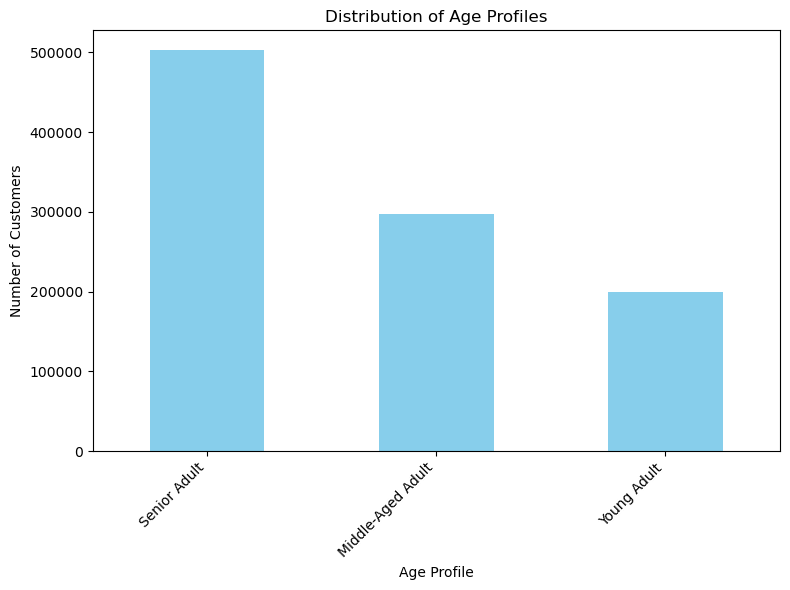

In [458]:
# 1. Visualize Age Profiles (Bar Chart)
age_counts = merged_df['age_profile'].value_counts()

plt.figure(figsize=(8, 6)) 
age_counts.plot.bar(color='skyblue')
plt.title('Distribution of Age Profiles')
plt.xlabel('Age Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

In [460]:
# 2. Income-Based Profiles

def create_income_profile(income):
    if income < 50000:
        return "Low Income"
    elif income < 100000:
        return "Middle Income"
    else:
        return "High Income"

In [462]:
merged_df['income_profile'] = merged_df['income'].apply(create_income_profile)

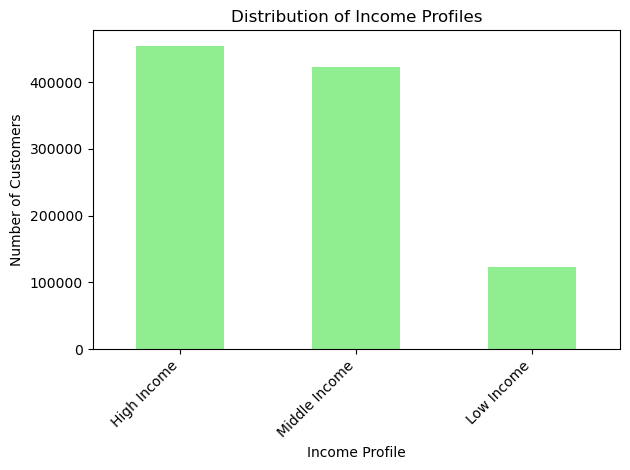

In [334]:
# Visualize Income Profiles
income_counts = merged_df['income_profile'].value_counts()
income_counts.plot.bar(color='lightgreen')
plt.title('Distribution of Income Profiles')
plt.xlabel('Income Profile')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [464]:
# i needed to see the columns of the dataframe.  merged_df.columns

In [466]:
customer_behaviour = merged_df.groupby([
    'user_id', 'Gender', 'region', 'state', 'num_dependents',
    'family_status', 'age_profile', 'order_number', 'order_dow',
    'order_hour_of_day', 'loyalty_flag', 'spending_flag'  
])['prices'].sum().reset_index()

In [467]:
customer_behaviour.head()

,user_id,Gender,region,state,num_dependents,family_status,age_profile,order_number,order_dow,order_hour_of_day,loyalty_flag,spending_flag,prices
0,1,Female,South,Alabama,3,married,Middle-Aged Adult,1,2,8,New Customer,Low spender,31.6
1,1,Female,South,Alabama,3,married,Middle-Aged Adult,2,3,7,New Customer,Low spender,35.4
2,1,Female,South,Alabama,3,married,Middle-Aged Adult,3,3,12,New Customer,Low spender,28.2
3,1,Female,South,Alabama,3,married,Middle-Aged Adult,4,4,7,New Customer,Low spender,26.0
4,1,Female,South,Alabama,3,married,Middle-Aged Adult,5,4,15,New Customer,Low spender,57.0


In [470]:
customer_profiles = merged_df.groupby([
    'user_id', 'Gender', 'region', 'state', 'num_dependents',
    'family_status', 'age_profile', 'loyalty_flag', 'spending_flag'
]).agg(
    total_spend=('prices', 'sum'),
    avg_spend=('prices', 'mean'),
    order_count=('order_number', 'count'),
    max_spend=('prices', 'max'),
    min_spend=('prices', 'min'),
    median_spend=('prices', 'median')
).reset_index()

In [472]:
customer_profiles


,user_id,Gender,region,state,num_dependents,family_status,age_profile,loyalty_flag,spending_flag,total_spend,avg_spend,order_count,max_spend,min_spend,median_spend
0,1,Female,South,Alabama,3,married,Middle-Aged Adult,New Customer,Low spender,375.7,6.367797,59,14.0,1.0,4.7
1,2,Female,West,Alaska,3,married,Senior Adult,Regular Customer,Low spender,1465.6,7.515897,195,14.8,1.3,6.6
2,3,Female,West,Arizona,3,married,Middle-Aged Adult,Regular Customer,Low spender,721.4,8.197727,88,14.4,1.3,8.2
3,4,Male,South,Arkansas,3,married,Middle-Aged Adult,New Customer,Low spender,147.7,8.205556,18,14.6,1.4,9.0
4,5,Female,West,California,0,divorced/widowed,Senior Adult,New Customer,Low spender,340.0,9.189189,37,14.8,3.2,8.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6469,6470,Female,South,Texas,0,divorced/widowed,Senior Adult,Regular Customer,Low spender,339.2,7.217021,47,13.1,1.4,4.6
6470,6471,Female,West,Utah,1,living with parents and siblings,Young Adult,New Customer,Low spender,1369.0,7.648045,179,14.8,1.2,7.9
6471,6472,Female,Northeast,Vermont,2,married,Senior Adult,Regular Customer,Low spender,1151.6,7.429677,155,20.8,1.0,7.5
6472,6473,Male,South,Virginia,3,living with parents and siblings,Young Adult,New Customer,Low spender,331.7,8.964865,37,14.2,1.1,9.1


# 7 & 8 Aggregate the max, mean, and min variables and compare

In [475]:
region_department_analysis = merged_df.groupby(['region', 'department_id']) \
    .agg(
        total_spend=('prices', 'sum'),
        avg_spend=('prices', 'mean'),
        order_count=('order_number', 'count'),
        customer_count=('user_id', 'nunique')
    ).reset_index()

In [477]:

# Display the results
from tabulate import tabulate
print(tabulate(region_department_analysis.head(), headers='keys', tablefmt='fancy_grid'))

╒════╤══════════╤═════════════════╤═══════════════╤═════════════╤═══════════════╤══════════════════╕
│    │ region   │   department_id │   total_spend │   avg_spend │   order_count │   customer_count │
╞════╪══════════╪═════════════════╪═══════════════╪═════════════╪═══════════════╪══════════════════╡
│  0 │ Midwest  │               1 │      121339   │     7.68068 │         15798 │             1192 │
├────┼──────────┼─────────────────┼───────────────┼─────────────┼───────────────┼──────────────────┤
│  1 │ Midwest  │               2 │        1654.1 │     7.58761 │           218 │              107 │
├────┼──────────┼─────────────────┼───────────────┼─────────────┼───────────────┼──────────────────┤
│  2 │ Midwest  │               3 │       64396.9 │     7.82465 │          8230 │             1033 │
├────┼──────────┼─────────────────┼───────────────┼─────────────┼───────────────┼──────────────────┤
│  3 │ Midwest  │               4 │      522184   │     7.97422 │         65484 │          

# 9 Visualizations

C:\Users\sosia\AppData\Local\Temp\ipykernel_51884\4071956178.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=region_department_analysis, x='region', y='total_spend', hue='department_id', ci=None)


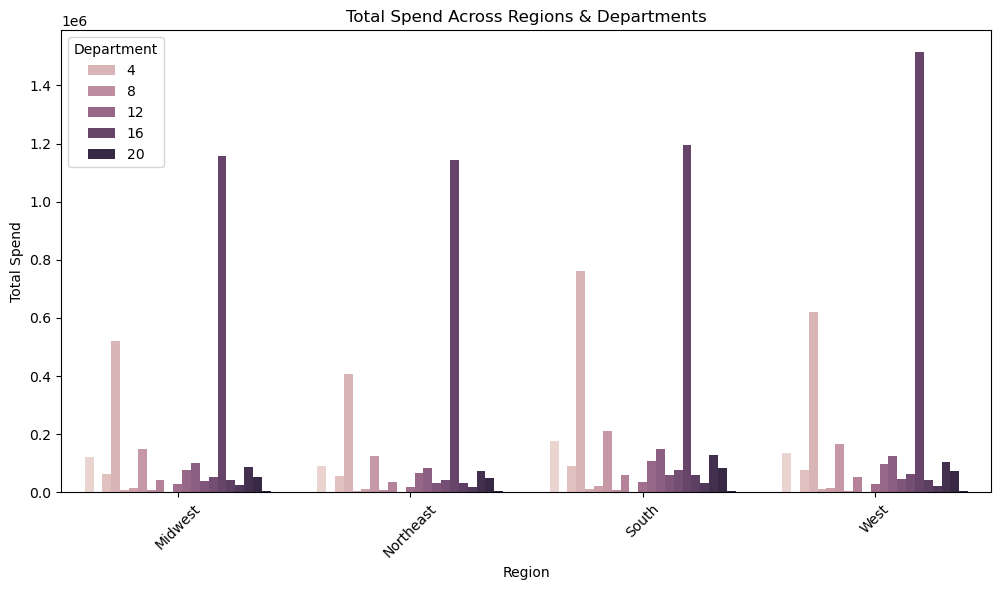

In [479]:
plt.figure(figsize=(12,6))
sns.barplot(data=region_department_analysis, x='region', y='total_spend', hue='department_id', ci=None)
plt.xticks(rotation=45)
plt.title("Total Spend Across Regions & Departments")
plt.xlabel("Region")
plt.ylabel("Total Spend")
plt.legend(title="Department")
plt.show()

In [481]:
# Aggregate total orders per department
order_department = merged_df.groupby('department_id')['order_number'].count()

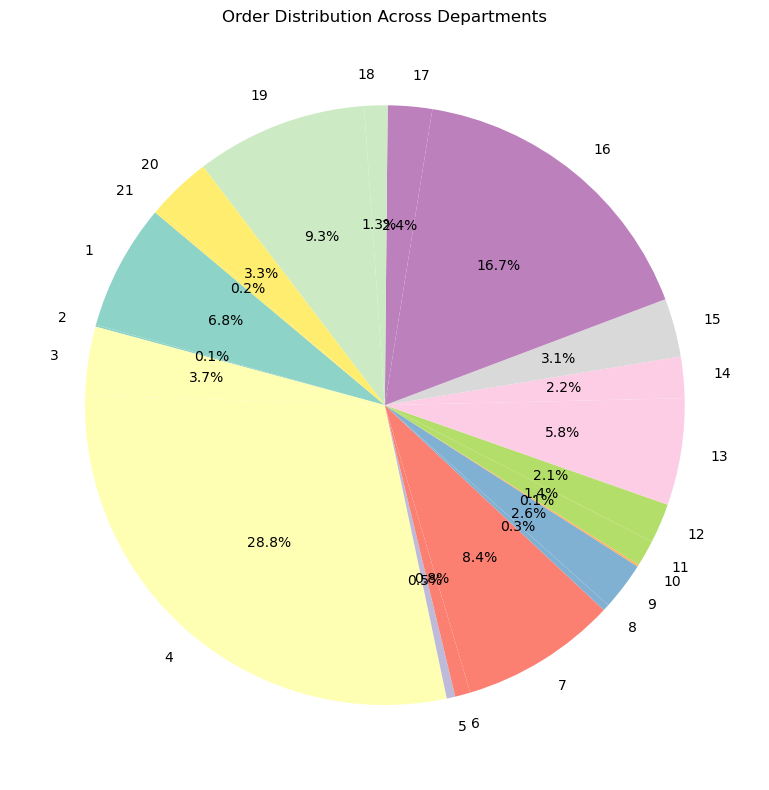

In [483]:
# Plot
plt.figure(figsize=(8,8))
order_department.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')
plt.title("Order Distribution Across Departments")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()

In [512]:
plt.savefig("C:/Users/sosia/12-2024 Instacart Basket Analysis/04 Analysis/Visualizations/order_distribution_department.png", dpi=300)
plt.show()

<Figure size 640x480 with 0 Axes>

In [514]:
# Aggregate loyalty flag distribution per region
region_loyalty = merged_df.groupby('region')['loyalty_flag'].value_counts(normalize=True).unstack()

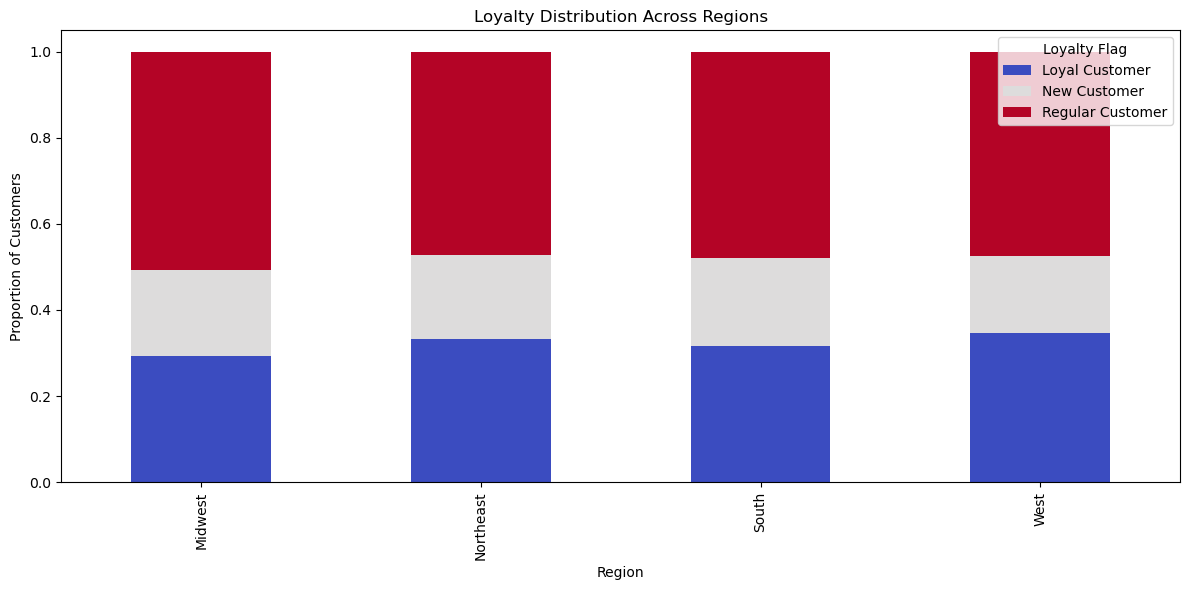

In [489]:
# Plot
region_loyalty.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title("Loyalty Distribution Across Regions")
plt.xlabel("Region")
plt.ylabel("Proportion of Customers")
plt.legend(title="Loyalty Flag")
plt.tight_layout()

In [491]:
# Save the figure
plt.savefig("C:/Users/sosia/12-2024 Instacart Basket Analysis/04 Analysis/Visualizations/loyalty_distribution_region.png")
plt.show()

<Figure size 640x480 with 0 Axes>